## Criar um modelo mais complexos para melhorar nosso desempenho de regressão 

In [4]:
# importando as bibliotecas
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#carga do Dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
print(numeric_features)


['temp', 'atemp', 'hum', 'windspeed']


'wget' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [6]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


In [7]:
# Caracteristicas e rotulos
# Depois de visualizar o cj de dados, criei matrizes que chamei de X contendo os recursos e Y contendo os rótulos

X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split dados 70% - 30% em cj de treinamento e cj de testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


Estruturei o seguinte conjunto de dados:

- X_train: Os valores de recurso que usaremos para treinar o modelo
- y_train: Os rótulos correspondentes que usaremos para treinar o modelo
- X_test: Os valores de recurso que usaremos para validar o modelo
- y_test: Os rótulos correspondentes que usaremos para validar o modelo

Lasso() 

MSE: 201155.70593338402
RMSE: 448.5038527519959
R2: 0.605646863782449


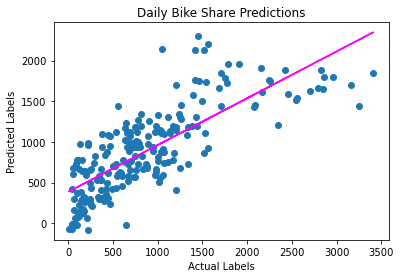

In [8]:
# O próximo passo foi treinar meu modelo de regressão usando um algoritmo lasso.

from sklearn.linear_model import Lasso

# ajuste do modelo de laço no cj de treinamento
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Avaliação do modelo usando dados de teste
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot previsto vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# sobreposição da linha de regressão
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Como alternativa a um modelo linear, utilizei uma abordagem baseada em árvores na qual as características do conjunto de dados foram examinadas em uma série de avaliações, cada uma das quais resultou em um ramo da árvore de decisão baseada no valor do recurso.

## O objetivo nesse primeiro momento é imprimir a definição do modelo e uma representação da árvore para prever valores de rótulo


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_6 <= 0.29
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_6 >  0.29
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_7 <= 0.28
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- feature_7 >  0.28
|   |   |   |   |   |   |   |--- val

Proximo passo: avaliar o modelo com os dados de teste.

MSE: 227400.83181818182
RMSE: 476.8656328759516
R2: 0.5541949417250057


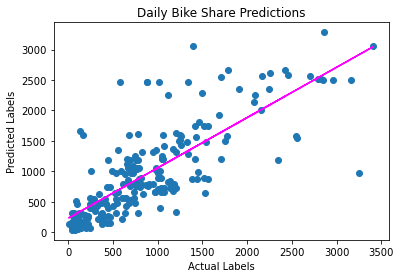

In [12]:
# avaliando dados de teste
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# plotando previsto vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# linha de regressão linear
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [13]:
# O modelo baseado em árvore melhorou em relação ao modelo linear. Optei por utilizar um algoritmo boosting, assim, 
# consigo aplicar uma função média a vários modelos de Árvore de Decisão

RandomForestRegressor() 

MSE: 113159.03331090907
RMSE: 336.39119089374066
R2: 0.7781588174670944


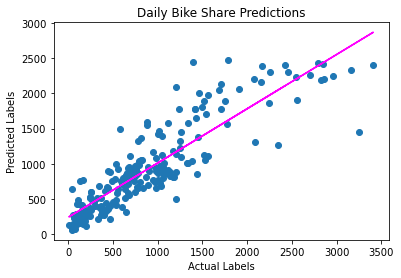

In [14]:
from sklearn.ensemble import RandomForestRegressor

# imprimindo o Modelo
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# avaliando o modelo com base nos dados de teste
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plotando previsto vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# linha de regressão linear
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 104266.85264786506
RMSE: 322.9037823375023
R2: 0.7955913795513425


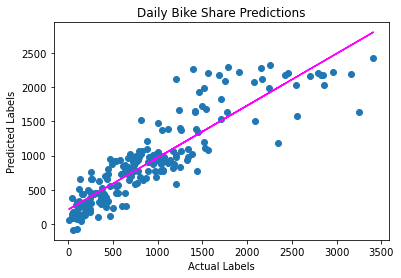

In [15]:
# buscando um previsão mais acertiva e estável, resolvi tentar um algoritmo "Random Forest". 

# Modelo
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# avaliando com os dados de teste
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Previsto vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# linha de regressão linear
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()



# Otimizando o desempenho

In [17]:
# Omportanto bibliotecas e módulos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# carga do cj de dados de treinamento
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separando características e rótulos
# Aqui utilizei o Numpy nomeando as matrizes para estruturar dados de teste e treinamento - X e Y
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Dividi 70%-30% para conjunto de testes e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


'wget' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


Agora temos:
- X_train: Os valores de recurso que usaremos para treinar o modelo
- y_train: Os rótulos correspondentes que usaremos para treinar o modelo
- X_test: Os valores de recurso que usaremos para validar o modelo
- y_test: Os rótulos correspondentes que usaremos para validar o modelo

GradientBoostingRegressor() 

MSE: 103685.81567692001
RMSE: 322.00281936175656
R2: 0.7967304660648835


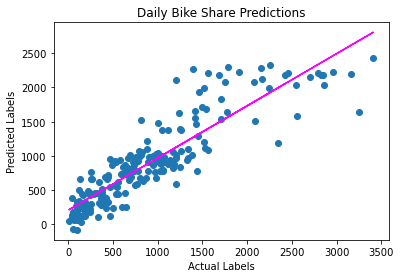

In [18]:
# Inserindo todo conjunto 

# Modelo
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# ajuste do modelo ao cj treinamento
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# avaliando com dados de teste
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plotando previsto vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# linha de reg. linear
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 103864.89640078867
RMSE: 322.28077262037937
R2: 0.7963793895454976


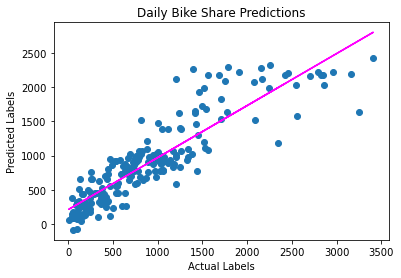

In [20]:
# Sintonizando parametros com várias combinações e encontrando o melhor resultado de desempenho.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# imoulsionando o algoritmo
alg = GradientBoostingRegressor()

# parametros
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Procurando o melhor parametro para ajuste das métricas
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# obtendo o melhor modelo
model=gridsearch.best_estimator_
print(model, "\n")

# avaliando o modelo usando dados de teste
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plotando previsto vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# linha de regressão
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [23]:
# estruturando o pipeline para encapsular as etapas de pré-processamento do meu algoritmo

# Modelo
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

#definindo o pre-processamento para col numericas
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define  pré-processamento para caracteristica
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Passos de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# criando o pre-processamento e treino pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Definindo o pré-processamento para n
# imprimindo linha regressão
model = pipeline.fit(X_train, (y_train))
print (model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 106038.02171902203
RMSE: 325.63479807757346
R2: 0.792119113752362


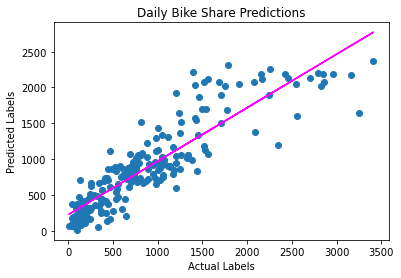

In [24]:
# Fazendo o input dos dados de validação

# Obtendo a previsão
predictions = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plotando previsto vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 102951.98729590909
RMSE: 320.86132097201914
R2: 0.7981690905481131


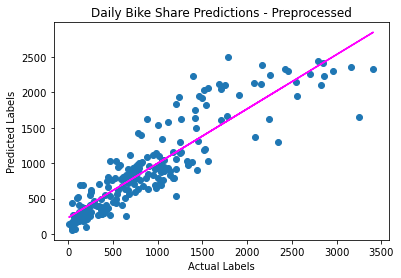

In [25]:
# Utilizando um pipeline diferente |*** apenas curiosidade
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


model = pipeline.fit(X_train, (y_train))
print (model, "\n")

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## salvado o modelo para inferência, fiquem a vontade para copiar...

In [26]:
#salvado o modelo para inferência, fiquem a vontade para copiar...

import joblib

# salvando o modelo
filename = './bike-share.pkl'
joblib.dump(model, filename)

# carga do modelo e do arquivo
loaded_model = joblib.load(filename)

# cria nova matriz com o numpy com as observações
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# para usar o modelo...
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 99 rentals


## Esta estrutura aceita uma série de observações, para que você possa usá-lo e gerar múltiplas previsões como um lote. Por exemplo, suponha que você tenha uma previsão meteorológica para os próximos cinco dias... você poderia usar o modelo para prever aluguel de bicicletas para cada dia com base nas condições climáticas esperadas ;)

In [29]:
# criando uma matriz com cinco dias de previsão do tempo
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# usando meu modelo para prever aluguéis
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))
    
# ****E este é o número de alugueis previstos:

5-day rental predictions:
505.0
742.0
238.0
198.0
280.0


## Qualquer dúvida, fiquem a vontade para me contatar.

## Grande abraço!

